In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

In [6]:
# Paths to directories
train_dir = "C:/Users/vedan/OneDrive/Desktop/Research/Brain MRI/Brain MRI Images/Train"
val_dir = "C:/Users/vedan/OneDrive/Desktop/Research/Brain MRI/Brain MRI Images/Validation"

# ImageDataGenerator for Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Load the data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='binary')

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


Epoch 1/10


C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 341ms/step - accuracy: 0.4735 - loss: 0.9829 - val_accuracy: 0.5750 - val_loss: 0.6717
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.5757 - loss: 0.6878 - val_accuracy: 0.5750 - val_loss: 0.6767
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.5677 - loss: 0.6775 - val_accuracy: 0.5750 - val_loss: 0.6660
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step - accuracy: 0.5512 - loss: 0.6917 - val_accuracy: 0.5750 - val_loss: 0.6819
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 525ms/step - accuracy: 0.5606 - loss: 0.6828 - val_accuracy: 0.5750 - val_loss: 0.6879
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 444ms/step - accuracy: 0.5783 - loss: 0.6718 - val_accuracy: 0.5750 - val_loss: 0.6542
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 437ms/step - accuracy: 0.5532 - loss: 0.6880 - val_accuracy: 0.5750 - val_loss: 0.6543
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 400ms/step - accuracy: 0.5383 - loss: 0.6788 - val_accuracy: 0.5750 - val

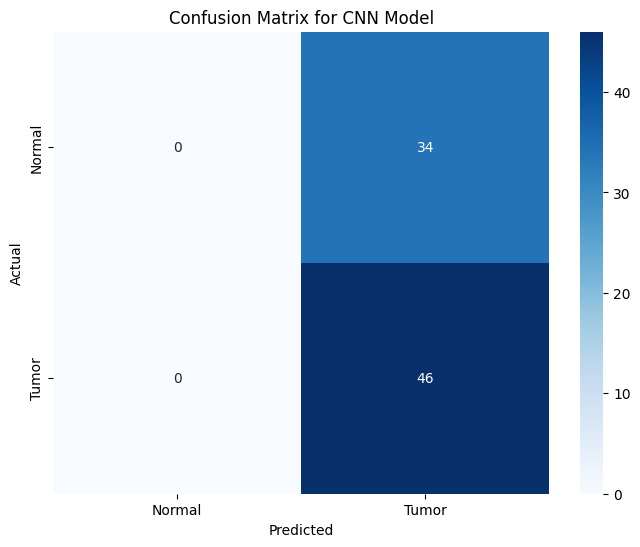

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model without the unsupported arguments
cnn_history = cnn_model.fit(
    train_generator, 
    validation_data=val_generator, 
    epochs=10
)

# Print the final accuracy
print("CNN Model Accuracy:", cnn_history.history['val_accuracy'][-1])

# Predict on validation set
val_preds = cnn_model.predict(val_generator)
val_preds_binary = (val_preds > 0.5).astype(int).flatten()

# Get true labels
val_labels = val_generator.classes

# Confusion matrix
cm = confusion_matrix(val_labels, val_preds_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.title('Confusion Matrix for CNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4658 - loss: 2.4307 - val_accuracy: 0.5750 - val_loss: 1.4519
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5870 - loss: 1.2174 - val_accuracy: 0.6750 - val_loss: 0.5465
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.7195 - loss: 0.6236 - val_accuracy: 0.7750 - val_loss: 0.4923
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.7064 - loss: 0.5714 - val_accuracy: 0.8125 - val_loss: 0.4141
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.7766 - loss: 0.5037 - val_accuracy: 0.8125 - val_loss: 0.3978
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.7852 - loss: 0.4239 - val_accuracy: 0.8125 - val_loss: 0.3696
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7984 - loss: 0.4011 - val_accuracy: 0.8250 - val_loss: 0.3404
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8023 - loss: 0.4162 - val_accuracy: 0.8625 - val_loss:

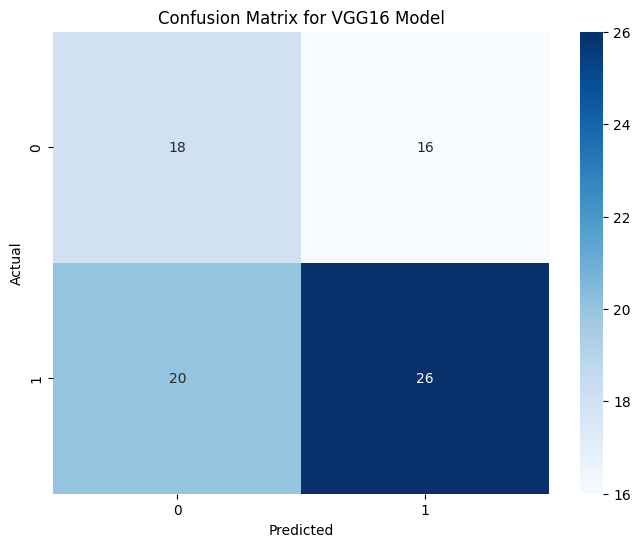

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

# 2. VGG16 Model (Transfer Learning)
vgg_base = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
for layer in vgg_base.layers:
    layer.trainable = False

vgg_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg_history = vgg_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Generate predictions for VGG16
y_pred_vgg = vgg_model.predict(val_generator)
y_pred_classes_vgg = np.where(y_pred_vgg > 0.5, 1, 0)

# Compute the confusion matrix
cm_vgg = confusion_matrix(val_generator.classes, y_pred_classes_vgg)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for VGG16 Model')
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5170 - loss: 3.9560 - val_accuracy: 0.4750 - val_loss: 0.7912
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5330 - loss: 1.0947 - val_accuracy: 0.5750 - val_loss: 0.9586
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4646 - loss: 0.9796 - val_accuracy: 0.5750 - val_loss: 0.8346
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5787 - loss: 0.7040 - val_accuracy: 0.5750 - val_loss: 0.7355
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5475 - loss: 0.7314 - val_accuracy: 0.5625 - val_loss: 0.6813
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5007 - loss: 0.7087 - val_accuracy: 0.5625 - val_loss: 0.6820
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5504 - loss: 0.6755 - val_accuracy: 0.5750 - val_loss: 0.7017
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5587 - loss: 0.6757 - val_accuracy: 0.5750 - val_loss:

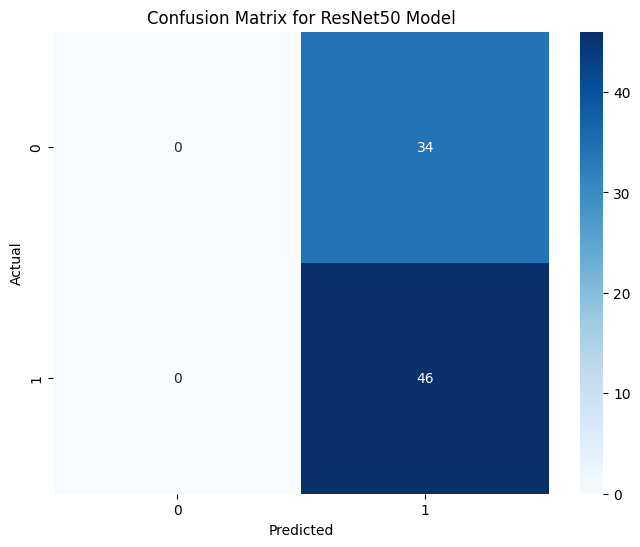

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

# 3. ResNet50 Model (Transfer Learning)
resnet_base = ResNet50(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
for layer in resnet_base.layers:
    layer.trainable = False

resnet_model = Sequential([
    resnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
resnet_history = resnet_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Generate predictions for ResNet50
y_pred_resnet = resnet_model.predict(val_generator)
y_pred_classes_resnet = (y_pred_resnet > 0.5).astype(int).flatten()

# Compute the confusion matrix
cm_resnet = confusion_matrix(val_generator.classes, y_pred_classes_resnet)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for ResNet50 Model')
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


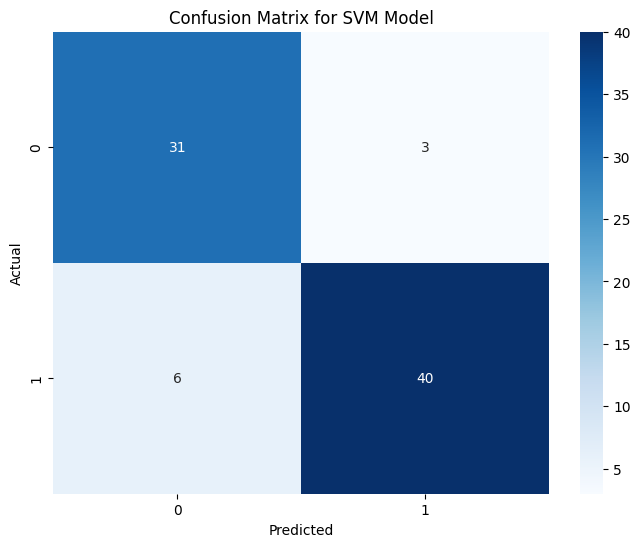

In [7]:
import numpy as np
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def extract_features(model, data_gen, sample_count):
    # Calculate the shape of the features
    feature_shape = model.output_shape[1:]  # e.g., (4, 4, 512)
    flattened_shape = np.prod(feature_shape)  # e.g., 8192

    # Initialize the feature and label arrays
    features = np.zeros(shape=(sample_count, flattened_shape))
    labels = np.zeros(shape=(sample_count))
    
    i = 0
    for inputs_batch, labels_batch in data_gen:
        features_batch = model.predict(inputs_batch)
        features_batch = features_batch.reshape(features_batch.shape[0], -1)  # Flatten the features
        
        # Calculate start and end indices for the current batch
        start_idx = i * data_gen.batch_size
        end_idx = min(start_idx + data_gen.batch_size, sample_count)  # Ensure we don't go out of bounds
        
        # Fill the features and labels arrays
        features[start_idx:end_idx] = features_batch[:end_idx - start_idx]
        labels[start_idx:end_idx] = labels_batch[:end_idx - start_idx]
        
        i += 1
        if end_idx >= sample_count:
            break
    
    return features, labels

# Assuming vgg_base and data generators are defined elsewhere
vgg_feature_model = Model(inputs=vgg_base.input, outputs=vgg_base.get_layer('block5_pool').output)

# Extract features
train_features, train_labels = extract_features(vgg_feature_model, train_generator, train_generator.samples)
val_features, val_labels = extract_features(vgg_feature_model, val_generator, val_generator.samples)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(train_features, train_labels)
svm_preds = svm_model.predict(val_features)
svm_accuracy = accuracy_score(val_labels, svm_preds)

# Plot confusion matrix for SVM
cm = confusion_matrix(val_labels, svm_preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for SVM Model')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step
Random Forest Model Accuracy: 0.65


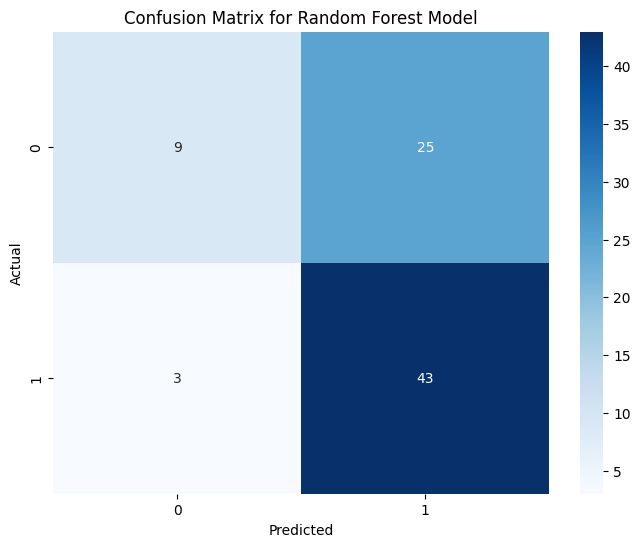

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

vgg_base = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
vgg_base.trainable = False

def extract_features(model, data_gen, sample_count):
    features = np.zeros(shape=(sample_count, 4 * 4 * 512))  # Example shape, adjust according to model output
    labels = np.zeros(shape=(sample_count))
    i = 0
    for inputs_batch, labels_batch in data_gen:
        features_batch = model.predict(inputs_batch)
        features[i * data_gen.batch_size: (i + 1) * data_gen.batch_size] = features_batch.reshape((features_batch.shape[0], -1))
        labels[i * data_gen.batch_size: (i + 1) * data_gen.batch_size] = labels_batch
        i += 1
        if i * data_gen.batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(vgg_base, train_generator, train_generator.samples)
val_features, val_labels = extract_features(vgg_base, val_generator, val_generator.samples)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_labels)

rf_preds = rf_model.predict(val_features)
rf_accuracy = accuracy_score(val_labels, rf_preds)
print("Random Forest Model Accuracy:", rf_accuracy)

cm = confusion_matrix(val_labels, rf_preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for Random Forest Model')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5550 - loss: 7.0139 - val_accuracy: 0.7125 - val_loss: 1.7295
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7299 - loss: 2.5981 - val_accuracy: 0.9250 - val_loss: 0.2911
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7612 - loss: 1.8126 - val_accuracy: 0.9000 - val_loss: 0.5139
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7770 - loss: 1.4850 - val_accuracy: 0.8750 - val_loss: 0.7367
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8592 - loss: 0.7695 - val_accuracy: 0.9375 - val_loss: 0.2836
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 877ms/step - accuracy: 0.8841 - loss: 0.4330 - val_accuracy: 0.9250 - val_loss: 0.2096
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 886ms/step - accuracy: 0.8837 - loss: 0.3122 - val_accuracy: 0.9750 - val_loss: 0.1032
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9300 - loss: 0.2440 - val_accuracy: 0.9750 - val

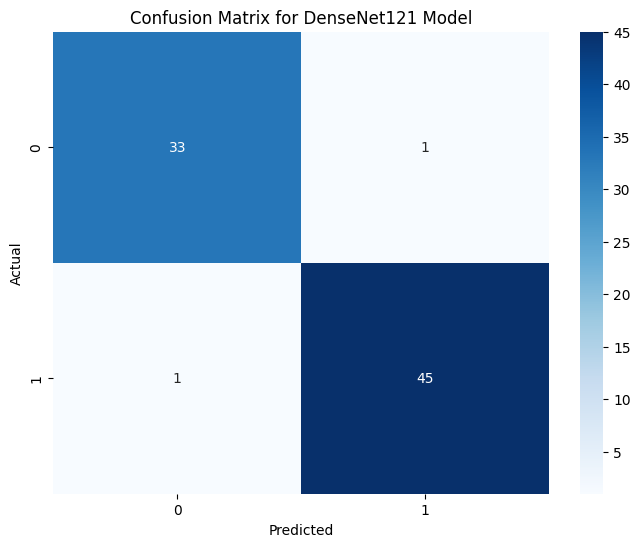

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

# Load the pre-trained DenseNet121 model
densenet_base = DenseNet121(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
densenet_base.trainable = False

# Build the model
densenet_model = Sequential([
    densenet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
densenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
densenet_history = densenet_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Print the final accuracy
print("DenseNet121 Model Accuracy:", densenet_history.history['val_accuracy'][-1])

# Function to extract features from a model
def extract_features(model, data_gen, sample_count):
    feature_shape = model.output_shape[1:]  # e.g., (4, 4, 1024)
    flattened_shape = np.prod(feature_shape)  # e.g., 16384

    features = np.zeros(shape=(sample_count, flattened_shape))
    labels = np.zeros(shape=(sample_count))
    
    i = 0
    for inputs_batch, labels_batch in data_gen:
        features_batch = model.predict(inputs_batch)
        features_batch = features_batch.reshape(features_batch.shape[0], -1)  # Flatten the features
        
        start_idx = i * data_gen.batch_size
        end_idx = min(start_idx + data_gen.batch_size, sample_count)
        
        features[start_idx:end_idx] = features_batch[:end_idx - start_idx]
        labels[start_idx:end_idx] = labels_batch[:end_idx - start_idx]
        
        i += 1
        if end_idx >= sample_count:
            break
    
    return features, labels

# Extract features from DenseNet121 model
densenet_feature_model = Sequential([
    densenet_base,
    Flatten()
])

train_features, train_labels = extract_features(densenet_feature_model, train_generator, train_generator.samples)
val_features, val_labels = extract_features(densenet_feature_model, val_generator, val_generator.samples)

# Make predictions on the validation set
val_predictions = densenet_model.predict(val_generator)
val_preds_binary = (val_predictions > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(val_labels, val_preds_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for DenseNet121 Model')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 655ms/step - accuracy: 0.4580 - loss: 11.5679 - val_accuracy: 0.5750 - val_loss: 6.1210
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - accuracy: 0.5099 - loss: 5.1462 - val_accuracy: 0.5750 - val_loss: 2.3938
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.4772 - loss: 2.6114 - val_accuracy: 0.5750 - val_loss: 0.6930
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 591ms/step - accuracy: 0.5524 - loss: 1.1132 - val_accuracy: 0.4250 - val_loss: 0.7185
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 521ms/step - accuracy: 0.3863 - loss: 0.8860 - val_accuracy: 0.5750 - val_loss: 0.6990
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 632ms/step - accuracy: 0.5629 - loss: 0.7216 - val_accuracy: 0.5750 - val_loss: 0.6819
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 461ms/step - accuracy: 0.5942 - loss: 0.6873 - val_accuracy: 0.5750 - val_loss: 0.6819
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 483ms/step - accuracy: 0.5546 - loss: 0.6881 - val_accuracy:

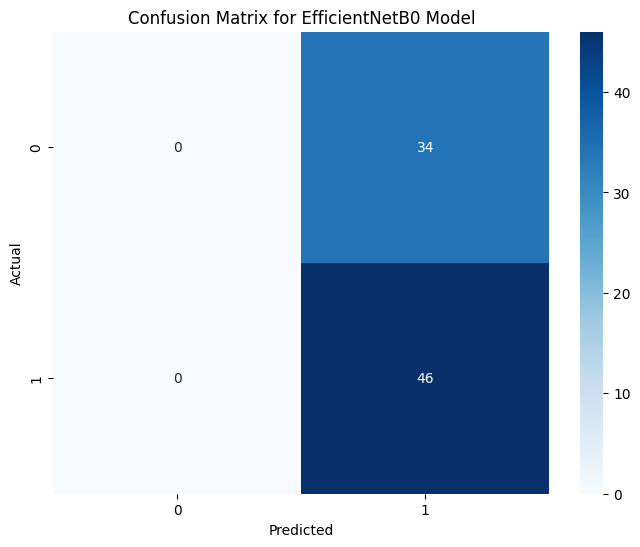

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

# Load the pre-trained EfficientNetB0 model
efficientnet_base = EfficientNetB0(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
efficientnet_base.trainable = False

# Build the model
efficientnet_model = Sequential([
    efficientnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
efficientnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
efficientnet_history = efficientnet_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Print the final accuracy
print("EfficientNetB0 Model Accuracy:", efficientnet_history.history['val_accuracy'][-1])

# Generate predictions for the validation set
val_predictions = efficientnet_model.predict(val_generator)
val_preds_binary = (val_predictions > 0.5).astype(int).flatten()

# Compute the confusion matrix
cm = confusion_matrix(val_generator.classes, val_preds_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for EfficientNetB0 Model')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.5399 - loss: 12.2014 - val_accuracy: 0.7625 - val_loss: 1.7600
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7498 - loss: 3.6137 - val_accuracy: 0.9125 - val_loss: 0.4009
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8227 - loss: 2.2446 - val_accuracy: 0.9375 - val_loss: 0.2104
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7712 - loss: 1.6536 - val_accuracy: 0.8000 - val_loss: 0.4298
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8428 - loss: 0.7718 - val_accuracy: 0.9375 - val_loss: 0.1500
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8076 - loss: 0.5917 - val_accuracy: 0.9375 - val_loss: 0.1776
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8354 - loss: 0.3537 - val_accuracy: 0.9625 - val_loss: 0.1511
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 907ms/step - accuracy: 0.8794 - loss: 0.2939 - val_accuracy: 0.9625 - val_l

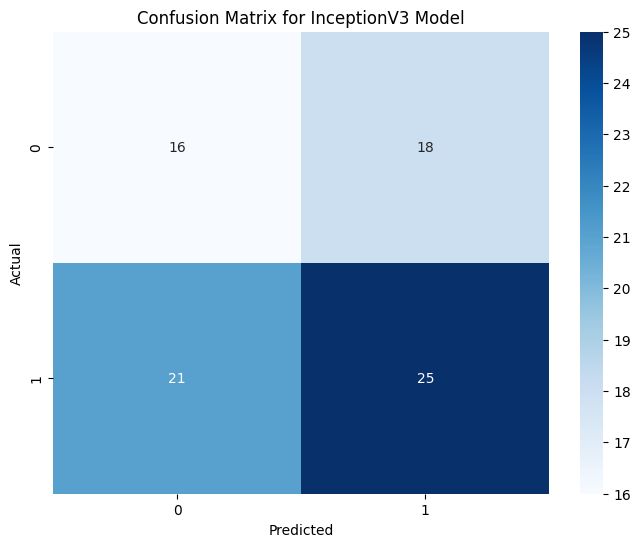

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

# Load the pre-trained InceptionV3 model
inception_base = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
inception_base.trainable = False

# Build the InceptionV3 model
inception_model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the InceptionV3 model
inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the InceptionV3 model
inception_history = inception_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Print the final validation accuracy
print("InceptionV3 Model Accuracy:", inception_history.history['val_accuracy'][-1])

# Generate predictions on the validation set
y_pred_inception = inception_model.predict(val_generator)
y_pred_classes_inception = np.where(y_pred_inception > 0.5, 1, 0)

# Compute the confusion matrix
cm_inception = confusion_matrix(val_generator.classes, y_pred_classes_inception)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for InceptionV3 Model')
sns.heatmap(cm_inception, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.6533 - loss: 8.1161 - val_accuracy: 0.8750 - val_loss: 0.8317
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7675 - loss: 3.5858 - val_accuracy: 0.8875 - val_loss: 1.0132
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7721 - loss: 3.4043 - val_accuracy: 0.7875 - val_loss: 2.3054
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7874 - loss: 3.2433 - val_accuracy: 0.8875 - val_loss: 0.5347
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8105 - loss: 1.8059 - val_accuracy: 0.9000 - val_loss: 0.2276
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8644 - loss: 0.7354 - val_accuracy: 0.9625 - val_loss: 0.1252
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9067 - loss: 0.3037 - val_accuracy: 0.9375 - val_loss: 0.1363
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8610 - loss: 0.4057 - val_accuracy: 0.9875 - val_loss:

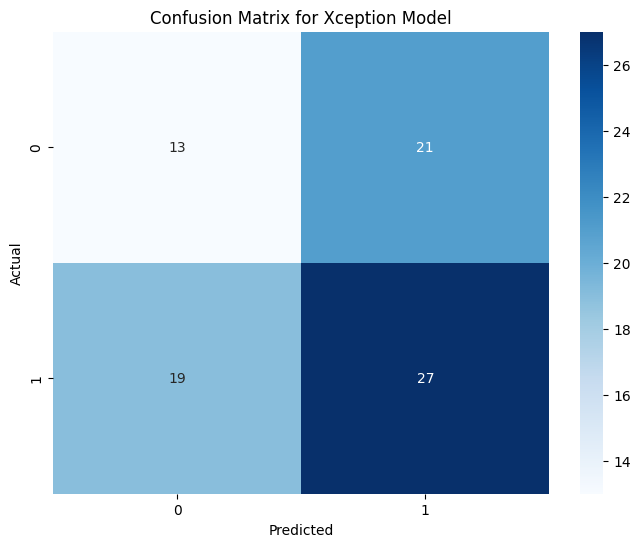

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0, Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

# Load the pre-trained Xception model
xception_base = Xception(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
xception_base.trainable = False

# Build the Xception model
xception_model = Sequential([
    xception_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the Xception model
xception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Xception model
xception_history = xception_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Print the final accuracy for the model
print("Xception Model Accuracy:", xception_history.history['val_accuracy'][-1])

# Generate predictions and plot the confusion matrix for Xception
y_pred_xception = xception_model.predict(val_generator)
y_pred_classes_xception = np.where(y_pred_xception > 0.5, 1, 0)

cm_xception = confusion_matrix(val_generator.classes, y_pred_classes_xception)

plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for Xception Model')
sns.heatmap(cm_xception, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [19]:
# Print accuracy for each model
print("CNN Model Accuracy:", cnn_history.history['val_accuracy'][-1])
print("VGG16 Model Accuracy:", vgg_history.history['val_accuracy'][-1])
print("ResNet50 Model Accuracy:", resnet_history.history['val_accuracy'][-1])
print("SVM Model Accuracy:", svm_accuracy)
print("Random Forest Model Accuracy:", rf_accuracy)
print("DenseNet121 Model Accuracy:", densenet_history.history['val_accuracy'][-1])
print("EfficientNetB0 Model Accuracy:", efficientnet_history.history['val_accuracy'][-1])
print("InceptionV3 Model Accuracy:", inception_history.history['val_accuracy'][-1])
print("Xception Model Accuracy:", xception_history.history['val_accuracy'][-1])

CNN Model Accuracy: 0.862500011920929
VGG16 Model Accuracy: 0.8374999761581421
ResNet50 Model Accuracy: 0.574999988079071
SVM Model Accuracy: 0.8875
Random Forest Model Accuracy: 0.65
DenseNet121 Model Accuracy: 0.9624999761581421
EfficientNetB0 Model Accuracy: 0.574999988079071
InceptionV3 Model Accuracy: 0.987500011920929
Xception Model Accuracy: 0.987500011920929


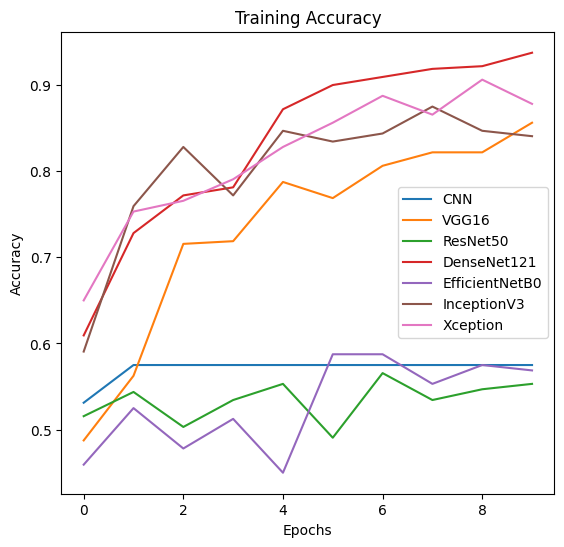

In [32]:
# Plotting Accuracy and Loss Curves
plt.figure(figsize=(14, 6))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN')
plt.plot(vgg_history.history['accuracy'], label='VGG16')
plt.plot(resnet_history.history['accuracy'], label='ResNet50')
plt.plot(densenet_history.history['accuracy'], label='DenseNet121')
plt.plot(efficientnet_history.history['accuracy'], label='EfficientNetB0')
plt.plot(inception_history.history['accuracy'], label='InceptionV3')
plt.plot(xception_history.history['accuracy'], label='Xception')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

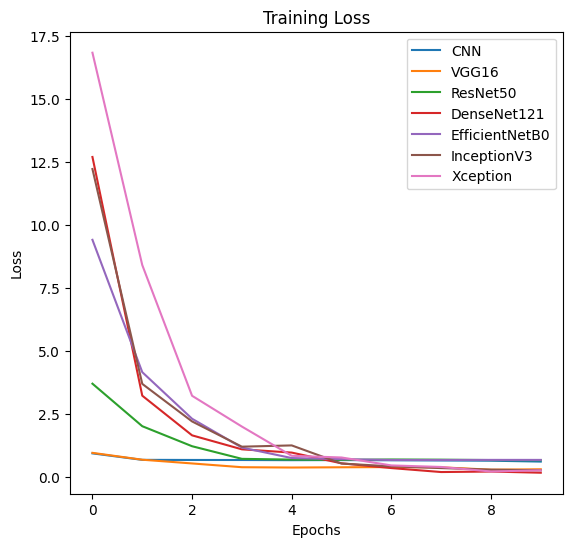

In [23]:
# Plot Training Loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN')
plt.plot(vgg_history.history['loss'], label='VGG16')
plt.plot(resnet_history.history['loss'], label='ResNet50')
plt.plot(densenet_history.history['loss'], label='DenseNet121')
plt.plot(efficientnet_history.history['loss'], label='EfficientNetB0')
plt.plot(inception_history.history['loss'], label='InceptionV3')
plt.plot(xception_history.history['loss'], label='Xception')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

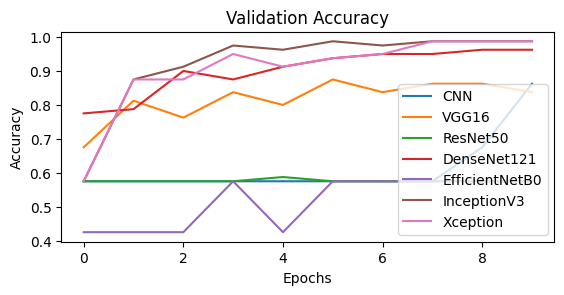

In [24]:
# Plot Validation Accuracy
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 3)
plt.plot(cnn_history.history['val_accuracy'], label='CNN')
plt.plot(vgg_history.history['val_accuracy'], label='VGG16')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet50')
plt.plot(densenet_history.history['val_accuracy'], label='DenseNet121')
plt.plot(efficientnet_history.history['val_accuracy'], label='EfficientNetB0')
plt.plot(inception_history.history['val_accuracy'], label='InceptionV3')
plt.plot(xception_history.history['val_accuracy'], label='Xception')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

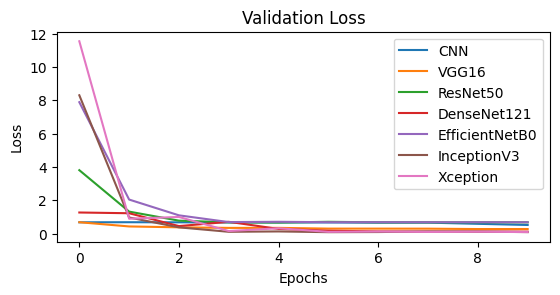

In [26]:
# Plot Validation Loss
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 3)
plt.plot(cnn_history.history['val_loss'], label='CNN')
plt.plot(vgg_history.history['val_loss'], label='VGG16')
plt.plot(resnet_history.history['val_loss'], label='ResNet50')
plt.plot(densenet_history.history['val_loss'], label='DenseNet121')
plt.plot(efficientnet_history.history['val_loss'], label='EfficientNetB0')
plt.plot(inception_history.history['val_loss'], label='InceptionV3')
plt.plot(xception_history.history['val_loss'], label='Xception')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


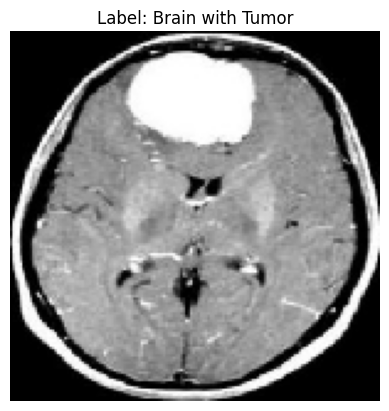

The selected Brain MRI Image is of a Brain with Tumor


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_with_cnn(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))  # Adjust target_size if needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Preprocess for CNN model

    prediction = model.predict(img_array)[0][0]
    label = 'Brain with Tumor' if prediction > 0.5 else 'Normal Brain'

    # Display the image
    plt.imshow(img)
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

    # Print the prediction
    print(f"The selected Brain MRI Image is of a {label}")

# Example usage
image_path = r"C:\Users\vedan\OneDrive\Desktop\Research\Brain MRI\Brain_tumor_images\Tumor\Tumor (24).jpg"  # Update with the path of your selected image
predict_with_cnn(image_path, cnn_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


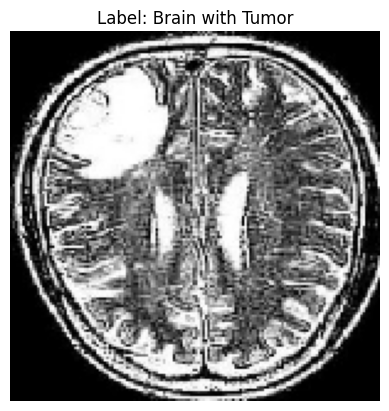

The selected Brain MRI Image is of a Brain with Tumor


In [18]:
from tensorflow.keras.preprocessing import image

def predict_with_vgg16(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))  # VGG16 requires 224x224 images
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)[0][0]
    label = 'Brain with Tumor' if prediction > 0.5 else 'Normal Brain'

    # Display the image
    plt.imshow(img)
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

    # Print the prediction
    print(f"The selected Brain MRI Image is of a {label}")

# Example usage
image_path = r"C:\Users\vedan\OneDrive\Desktop\Research\Brain MRI\Brain_tumor_images\Tumor\Tumor (29).jpg"
predict_with_vgg16(image_path, vgg_model)